In [1]:
import os
import glob
import time

import pandas as pd
import numpy as np
import xarray as xr
import datetime


import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline
import cartopy.crs as ccrs
import cartopy

from wrfProcessing import *

import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)

from tools.generalTools import qsat
SCRATCH='/global/cscratch1/sd/qnicolas/'

In [2]:
def extract_wrfout(simulation_path,nfiles=30): #default extracts 300 days
    files=sorted(glob.glob(simulation_path+'wrfout_d01_197*'))
    files = files[:min(len(files),nfiles)]
    return xr.open_mfdataset(files,combine='nested',concat_dim='Time',parallel=True)

In [3]:
%%time
Mctwrf = extract_wrfout("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.crosseq.mountain.100km.1000d/",nfiles=30)
M50wrf = extract_wrfout("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.50x100.mountain.100km.300d/",nfiles=30)
M40wrf = extract_wrfout("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.40x100.mountain.100km.300d/",nfiles=30)
M80wrf = extract_wrfout("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.80x100.mountain.100km.300d/",nfiles=30)


CPU times: user 45.1 s, sys: 34.1 s, total: 1min 19s
Wall time: 45.7 s


In [4]:
%%time
Actwrf = extract_wrfout("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.crosseq.aquaplanet.100km.300d/",nfiles=30)
A40wrf = extract_wrfout("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.40x100.aquaplanet.100km.300d/",nfiles=30)
A45wrf = extract_wrfout("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.45x100.aquaplanet.100km.100d/",nfiles=10)
A50wrf = extract_wrfout("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.50x100.aquaplanet.100km.100d/",nfiles=10)
A60wrf = extract_wrfout("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.60x100.aquaplanet.100km.100d/",nfiles=10)
A80wrf = extract_wrfout("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.80x100.aquaplanet.100km.100d/",nfiles=10)
A50wrf2 = extract_wrfout("/global/cscratch1/sd/qnicolas/wrfdata/saved/stretchfalse.wrf.50x100.aquaplanet.100km.100d/",nfiles=10)


CPU times: user 28 s, sys: 12.1 s, total: 40.1 s
Wall time: 34.3 s


In [5]:
def plotprofiles(sim,var,label,ax=None,level=3,final=True):
    simvar = sim[var]
    renamedict = {}
    if "west_east_stag" in simvar.dims :
        renamedict = {'west_east_stag':'west_east'}
    if "south_north_stag" in simvar.dims :
        renamedict = {'south_north_stag':'south_north'}
    if "bottom_top_stag" in simvar.dims :
        renamedict = {'bottom_top_stag':'bottom_top'}
    simvar=simvar.rename(renamedict)
    if final : 
        tslice = slice(-200,-1)
    else :
        tslice = slice(200,400)
    if not ax :
        _, ax = plt.subplots(1,1,figsize=(7,4))
    simlat = simvar.south_north-len(simvar.south_north)/2
    if "bottom_top" in simvar.dims : 
        ax.plot(simlat,simvar.isel(Time=tslice,bottom_top=level).mean(["Time","west_east"]).persist(),label=label)
        ax.set_title(simvar.description+" at about %i hPa"%(sim.PB.isel(Time=-1,west_east=0,south_north=len(sim.south_north)//2,bottom_top=level)/100))
    else :
        ax.plot(simlat,simvar.isel(Time=tslice).mean(["Time","west_east"]).persist(),label=label)
        ax.set_title(simvar.description)
    ax.legend()

# Comparing profiles - 80°x140° vs 50°x100° vs 40°x100° domains

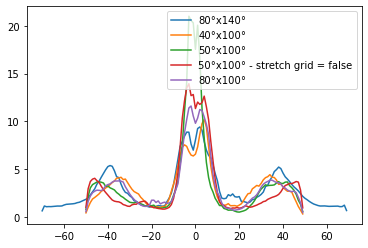

In [7]:
#plt.plot(Mctwrf.south_north-70,4*(Mctwrf.RAINC+Mctwrf.RAINNC).isel(Time=slice(200,400)).diff('Time').mean(["Time","west_east"]).persist(),label="80°x140°")
#plt.plot(M40wrf.south_north-50,4*(M40wrf.RAINC+M40wrf.RAINNC).isel(Time=slice(200,400)).diff('Time').mean(["Time","west_east"]).persist(),label="50°x100°")
plt.plot(Actwrf.south_north-70,4*(Actwrf.RAINC+Actwrf.RAINNC).isel(Time=slice(200,400)).diff('Time').mean(["Time","west_east"]).persist(),label="80°x140°")
plt.plot(A40wrf.south_north-50,4*(A40wrf.RAINC+A40wrf.RAINNC).isel(Time=slice(200,400)).diff('Time').mean(["Time","west_east"]).persist(),label="40°x100°")
#plt.plot(A45wrf.south_north-50,4*(A45wrf.RAINC+A45wrf.RAINNC).isel(Time=slice(200,400)).diff('Time').mean(["Time","west_east"]).persist(),label="45°x100°")
plt.plot(A50wrf.south_north-50,4*(A50wrf.RAINC+A50wrf.RAINNC).isel(Time=slice(200,400)).diff('Time').mean(["Time","west_east"]).persist(),label="50°x100°")
plt.plot(A50wrf2.south_north-50,4*(A50wrf2.RAINC+A50wrf2.RAINNC).isel(Time=slice(200,400)).diff('Time').mean(["Time","west_east"]).persist(),label="50°x100° - stretch grid = false")
#plt.plot(A60wrf.south_north-50,4*(A60wrf.RAINC+A60wrf.RAINNC).isel(Time=slice(200,400)).diff('Time').mean(["Time","west_east"]).persist(),label="60°x100°")
plt.plot(A80wrf.south_north-50,4*(A80wrf.RAINC+A80wrf.RAINNC).isel(Time=slice(200,400)).diff('Time').mean(["Time","west_east"]).persist(),label="80°x100°")

plt.legend()


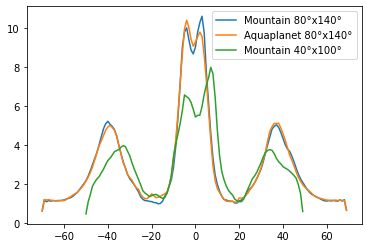

In [39]:
plt.plot(Mctwrf.south_north-70,4*(Mctwrf.RAINC+Mctwrf.RAINNC).isel(Time=slice(400,1200)).diff('Time').mean(["Time","west_east"]).persist(),label="Mountain 80°x140°")
plt.plot(Actwrf.south_north-70,4*(Actwrf.RAINC+Actwrf.RAINNC).isel(Time=slice(400,1200)).diff('Time').mean(["Time","west_east"]).persist(),label="Aquaplanet 80°x140°")
plt.plot(M40wrf.south_north-50,4*(M40wrf.RAINC+M40wrf.RAINNC).isel(Time=slice(400,1200)).diff('Time').mean(["Time","west_east"]).persist(),label="Mountain 40°x100°")

plt.legend()


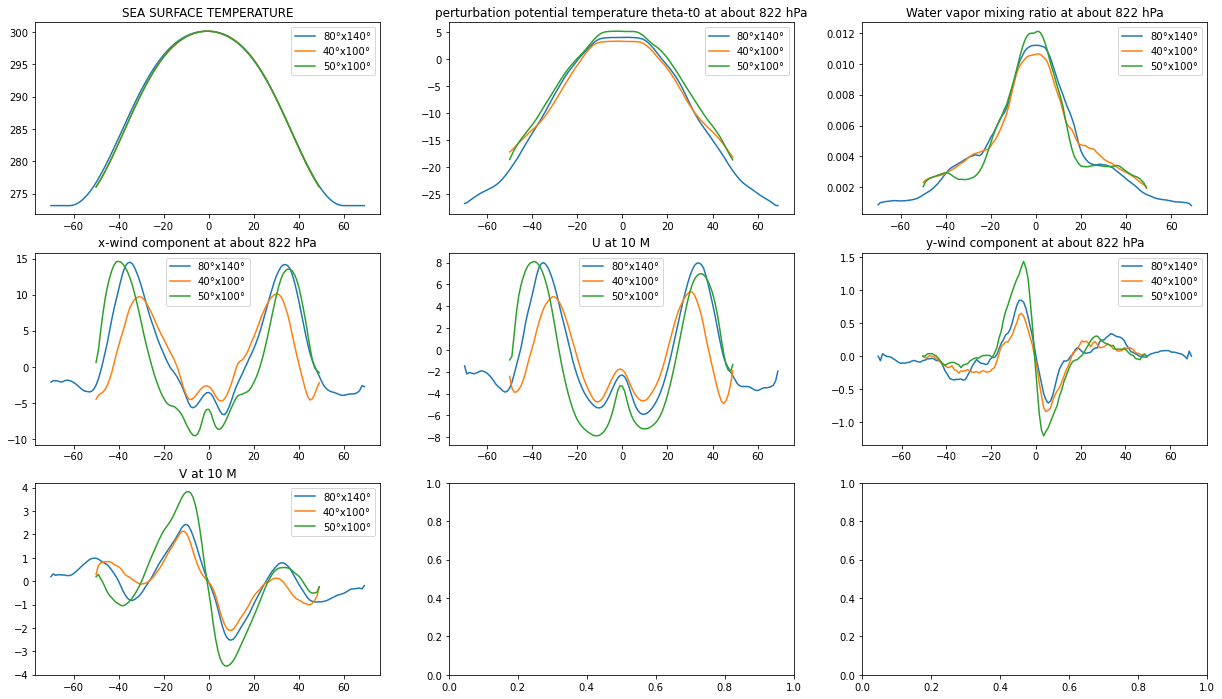

In [40]:
_,ax=plt.subplots(3,3,figsize=(21,12))
ax=ax.reshape(-1)
for (sim,lbl) in [(Actwrf,"80°x140°"),(A40wrf,"40°x100°"),(A50wrf,"50°x100°")]:
    plotprofiles(sim,'SST'   ,lbl,ax[0])
    plotprofiles(sim,'T'     ,lbl,ax[1])
    plotprofiles(sim,'QVAPOR',lbl,ax[2])
    plotprofiles(sim,'U'     ,lbl,ax[3])
    plotprofiles(sim,'U10'   ,lbl,ax[4])
    plotprofiles(sim,'V'     ,lbl,ax[5])
    plotprofiles(sim,'V10'   ,lbl,ax[6])

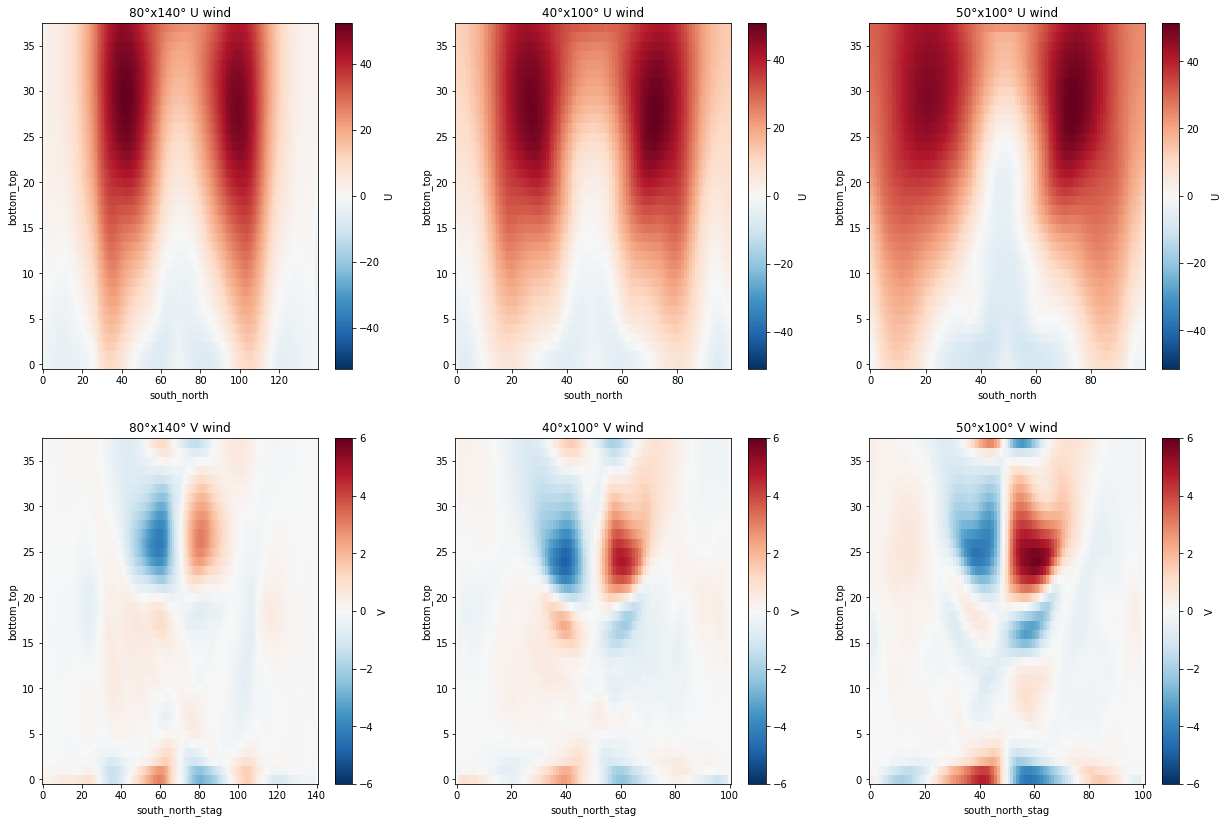

In [44]:
_,ax=plt.subplots(2,3,figsize=(21,14))
ax=ax.reshape(-1)
i=0
for (sim,lbl) in [(Actwrf,"80°x140°"),(A40wrf,"40°x100°"),(A50wrf,"50°x100°")]:
    sim.U.isel(Time=slice(200,400)).mean(["Time","west_east_stag"]).plot(ax=ax[i], x='south_north')
    ax[i].set_title(lbl + " U wind")
    i+=1
for (sim,lbl) in [(Actwrf,"80°x140°"),(A40wrf,"40°x100°"),(A50wrf,"50°x100°")]:
    sim.V.isel(Time=slice(200,400)).mean(["Time","west_east"]).plot(ax=ax[i], x='south_north_stag',vmin=-6,vmax=6,cmap=plt.cm.RdBu_r)
    ax[i].set_title(lbl + " V wind")
    i+=1




    

# 80°x100° vs 40°x100°

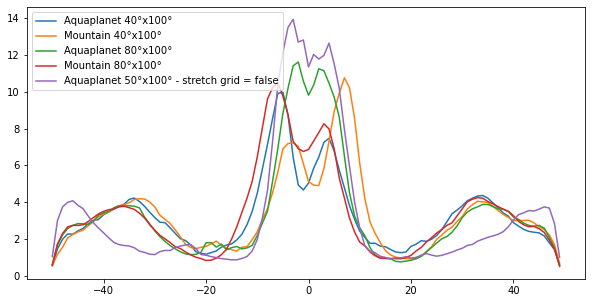

In [8]:
_,ax=plt.subplots(1,1,figsize=(10,5))
plt.plot(A40wrf.south_north-50,4*(A40wrf.RAINC+A40wrf.RAINNC).isel(Time=slice(400,800)).diff('Time').mean(["Time","west_east"]).persist(),label="Aquaplanet 40°x100°")
plt.plot(M40wrf.south_north-50,4*(M40wrf.RAINC+M40wrf.RAINNC).isel(Time=slice(400,800)).diff('Time').mean(["Time","west_east"]).persist(),label="Mountain 40°x100°")
plt.plot(A80wrf.south_north-50,4*(A80wrf.RAINC+A80wrf.RAINNC).isel(Time=slice(200,400)).diff('Time').mean(["Time","west_east"]).persist(),label="Aquaplanet 80°x100°")
plt.plot(M80wrf.south_north-50,4*(M80wrf.RAINC+M80wrf.RAINNC).isel(Time=slice(400,800)).diff('Time').mean(["Time","west_east"]).persist(),label="Mountain 80°x100°")
plt.plot(A50wrf2.south_north-50,4*(A50wrf2.RAINC+A50wrf2.RAINNC).isel(Time=slice(200,400)).diff('Time').mean(["Time","west_east"]).persist(),label="Aquaplanet 50°x100° - stretch grid = false")

plt.legend()


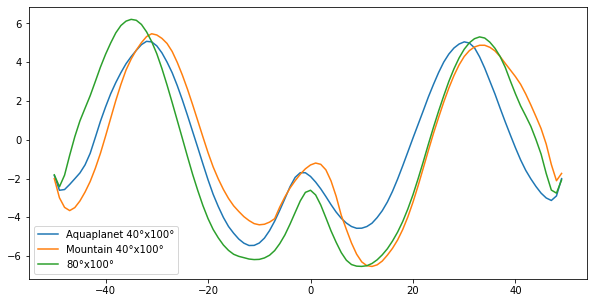

In [67]:
_,ax=plt.subplots(1,1,figsize=(10,5))
plt.plot(A40wrf.south_north-50,A40wrf.U10.isel(Time=slice(400,800)).mean(["Time","west_east"]).persist(),label="Aquaplanet 40°x100°")
plt.plot(M40wrf.south_north-50,M40wrf.U10.isel(Time=slice(400,800)).mean(["Time","west_east"]).persist(),label="Mountain 40°x100°")
plt.plot(A80wrf.south_north-50,A80wrf.U10.isel(Time=slice(200,400)).mean(["Time","west_east"]).persist(),label="80°x100°")

plt.legend()


In [9]:
M40precip = 4*(M40wrf.RAINC+M40wrf.RAINNC).isel(Time=slice(400,1200)).diff('Time').persist()
M80precip = 4*(M80wrf.RAINC+M80wrf.RAINNC).isel(Time=slice(400,1200)).diff('Time').persist()


Text(0.5, 1.0, 'Mean precipitation')

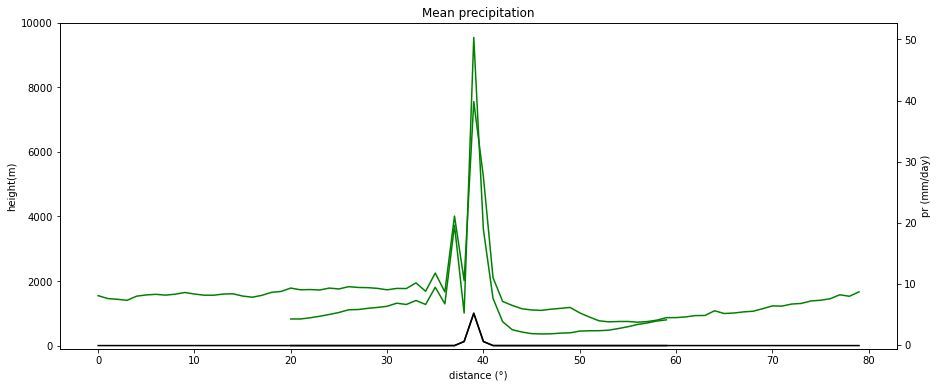

In [21]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

ax.set_xlabel("distance (°)")
ax.set_ylabel("height(m)")
ax.plot(M40wrf.HGT.west_east+20,M40wrf.HGT.sel(south_north=slice(47,53)).mean(['south_north','Time'])[::-1],color='k')
ax.plot(M80wrf.HGT.west_east,M80wrf.HGT.sel(south_north=slice(47,53)).mean(['south_north','Time'])[::-1],color='k')
ax2=ax.twinx()
ax2.set_ylabel("pr (mm/day)")
ax2.plot(M40precip.west_east+20,M40precip.sel(south_north=slice(47,53)).mean(['south_north','Time'])[::-1],color='green')
ax2.plot(M80precip.west_east,M80precip.sel(south_north=slice(47,53)).mean(['south_north','Time'])[::-1],color='green')

ax.set_ylim(-100,10000)
ax.set_title("Mean precipitation")

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

ax.set_xlabel("distance (°)")
ax.set_ylabel("height(m)")
ax.plot(M40wrf.HGT.west_east+20,M40wrf.HGT.sel(south_north=slice(47,53)).mean(['south_north','Time'])[::-1],color='k')
ax.plot(M80wrf.HGT.west_east,M80wrf.HGT.sel(south_north=slice(47,53)).mean(['south_north','Time'])[::-1],color='k')
ax2=ax.twinx()
ax2.set_ylabel("u (m/s)")
ax2.plot(M40wrf.U10.west_east+20,M40wrf.U10.sel(south_north=slice(47,53)).isel(Time=slice(400,1200)).mean(['south_north','Time'])[::-1],color='green')
ax2.plot(M80wrf.U10.west_east,M80wrf.U10.sel(south_north=slice(47,53)).isel(Time=slice(400,1200)).mean(['south_north','Time'])[::-1],color='green')
ax2.plot(M50wrf.U10.west_east+15,M50wrf.U10.sel(south_north=slice(47,53)).isel(Time=slice(400,1200)).mean(['south_north','Time'])[::-1],color='green')

ax.set_ylim(-100,10000)
ax.set_title("U wind")